# BAN200 Module 4

# Imports

In [1]:
from itertools import chain, combinations
from google.colab import files
import networkx
import matplotlib.pyplot as plt

# Facebook Data

Today we will be using the file [facebook_combined.txt](https://seneca-my.sharepoint.com/:t:/g/personal/william_dick_senecacollege_ca/EeLmdQvktFpGkSrs1lo5YrkBtNme5mk098YoQBe0G4uK9Q?e=4JSbOU). This file comes from the [Stanford Large Network Dataset Collection](https://snap.stanford.edu/data/index.html). This file contains a list of undirected network edges. Each row in the file is one edge in the network. The row contains two, space-delimited numbers. These numbers are the two nodes connected by the edge. 

When you run the code below, you will be prompted to upload a file from your computer. Upload [facebook_combined.txt](https://seneca-my.sharepoint.com/:t:/g/personal/william_dick_senecacollege_ca/EeLmdQvktFpGkSrs1lo5YrkBtNme5mk098YoQBe0G4uK9Q?e=4JSbOU).

In [3]:
uploaded_files = files.upload()
facebook_data_raw = uploaded_files['facebook_combined.txt'].decode('utf8')

Saving facebook_combined.txt to facebook_combined.txt


`facebook_data_raw` is a string.

In [8]:
facebook_data_raw

'0 1\n0 2\n0 3\n0 4\n0 5\n0 6\n0 7\n0 8\n0 9\n0 10\n0 11\n0 12\n0 13\n0 14\n0 15\n0 16\n0 17\n0 18\n0 19\n0 20\n0 21\n0 22\n0 23\n0 24\n0 25\n0 26\n0 27\n0 28\n0 29\n0 30\n0 31\n0 32\n0 33\n0 34\n0 35\n0 36\n0 37\n0 38\n0 39\n0 40\n0 41\n0 42\n0 43\n0 44\n0 45\n0 46\n0 47\n0 48\n0 49\n0 50\n0 51\n0 52\n0 53\n0 54\n0 55\n0 56\n0 57\n0 58\n0 59\n0 60\n0 61\n0 62\n0 63\n0 64\n0 65\n0 66\n0 67\n0 68\n0 69\n0 70\n0 71\n0 72\n0 73\n0 74\n0 75\n0 76\n0 77\n0 78\n0 79\n0 80\n0 81\n0 82\n0 83\n0 84\n0 85\n0 86\n0 87\n0 88\n0 89\n0 90\n0 91\n0 92\n0 93\n0 94\n0 95\n0 96\n0 97\n0 98\n0 99\n0 100\n0 101\n0 102\n0 103\n0 104\n0 105\n0 106\n0 107\n0 108\n0 109\n0 110\n0 111\n0 112\n0 113\n0 114\n0 115\n0 116\n0 117\n0 118\n0 119\n0 120\n0 121\n0 122\n0 123\n0 124\n0 125\n0 126\n0 127\n0 128\n0 129\n0 130\n0 131\n0 132\n0 133\n0 134\n0 135\n0 136\n0 137\n0 138\n0 139\n0 140\n0 141\n0 142\n0 143\n0 144\n0 145\n0 146\n0 147\n0 148\n0 149\n0 150\n0 151\n0 152\n0 153\n0 154\n0 155\n0 156\n0 157\n0 158\n0

# Creating a Graph Object

We use the `networkx` library to create a `Graph` object. We call this object `fbGraph`. We then iterate over each line in `facebook_data_raw`. Each line in the file corresponds to an edge, which we parse and add to `fbGraph`. 

In [9]:
fbGraph = networkx.Graph()
lines = facebook_data_raw.strip().split('\n')
for line in lines:
    clean_line = line.strip()
    split_line = clean_line.split(' ')
    nodeA = int(split_line[0])
    nodeB = int(split_line[1])
    fbGraph.add_edge(nodeA,nodeB)

`fbGraph` has 4,039 nodes and 88,234 edges. 

In [11]:
networkx.info(fbGraph)

'Graph with 4039 nodes and 88234 edges'

We can looking up the edges that connect to node `x` using the following. 

In [15]:
x = 55
fbGraph.edges(x)

EdgeDataView([(55, 0), (55, 21), (55, 26), (55, 56), (55, 67), (55, 104), (55, 122), (55, 123), (55, 170), (55, 185), (55, 186), (55, 200), (55, 203), (55, 239), (55, 252), (55, 261), (55, 277)])

Node 24 has 16 edges. 

In [17]:
x = 1932
len(fbGraph.edges(x))

95

# Degree Centrality

Let's calculate the degree centrality of every node and save it in a variable called `degree_centrality`. 

In [18]:
degree_centrality = fbGraph.degree()

Node 24 has a degree centrality of 16.

In [20]:
x = 24
degree_centrality[x]

16

Let's take a look at the 10 nodes with the highest degree centrality. 

In [21]:
for i in sorted(degree_centrality, key=lambda x:x[1], reverse=True)[0:12]:
	print(i[0], i[1])

107 1045
1684 792
1912 755
3437 547
0 347
2543 294
2347 291
1888 254
1800 245
1663 235
1352 234
2266 234


# Betweeness Centrality

We can calculate betweenness centrality using the function below. 

In [22]:
betweenness_centrality = networkx.betweenness_centrality(fbGraph,normalized=True,endpoints=True)

The variable betweenness_centrality is a dictionary that stores each node's calculated betweeness centrality. 

In [23]:
print(betweenness_centrality)

{0: 0.14672864694039878, 1: 0.0004979539685162632, 2: 0.0004952479848984839, 3: 0.0004968563035535977, 4: 0.0004953560143724981, 5: 0.0004973769441273681, 6: 0.0004951965979054392, 7: 0.0006653862289150845, 8: 0.0004954479854111859, 9: 0.0005116181609198613, 10: 0.0004952219149977013, 11: 0.0004951720722951225, 12: 0.0004951720722951225, 13: 0.0004969334714252079, 14: 0.0004957300830155651, 15: 0.0004951720722951225, 16: 0.0004953717679551752, 17: 0.0004955825356344515, 18: 0.0004951720722951225, 19: 0.0005002325232238113, 20: 0.0004958511052236162, 21: 0.0014327319732821264, 22: 0.0004958420406012568, 23: 0.000502029024179513, 24: 0.0004953087393121357, 25: 0.0005490262234067426, 26: 0.0005145168565346672, 27: 0.0004952027293080184, 28: 0.0004955530995934977, 29: 0.0004965668630867019, 30: 0.0004965408569163509, 31: 0.0005001022710417224, 32: 0.0004951720722951225, 33: 0.0004951720722951225, 34: 0.004095476547048463, 35: 0.0004951720722951225, 36: 0.0004951993229732523, 37: 0.00049517

Node 0 has a betweenness centrality of 0.1467.

In [24]:
betweenness_centrality[1589]

0.0005444506763106992

Let's take a look at the 10 nodes with the highest betweeness centrality. 

In [28]:
for i in sorted(betweenness_centrality.items(), key=lambda x:x[1], reverse=True)[0:15]:
	print(i[0], i[1])

107 0.48077531149557645
1684 0.33812535393929544
3437 0.23649361170042005
1912 0.22967697101070242
1085 0.14943647607698152
0 0.14672864694039878
698 0.1157685138598761
567 0.0967578131045644
58 0.08481360516228129
428 0.06477239041384117
563 0.06324431352887111
860 0.058292445169069125
414 0.048104958328013536
1577 0.04026017682683038
348 0.03847445395654158


# Network Diagrams

We can draw a picture of the network. 

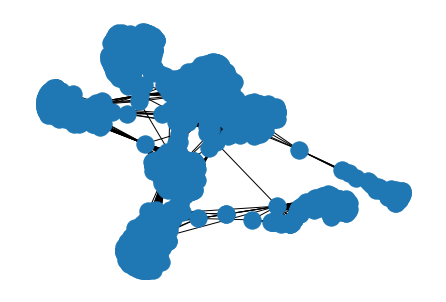

In [29]:
networkx.draw(fbGraph)

We can customize the size of each node in our network drawing. The code below sets the node size proportional to the node's degree centrality. 

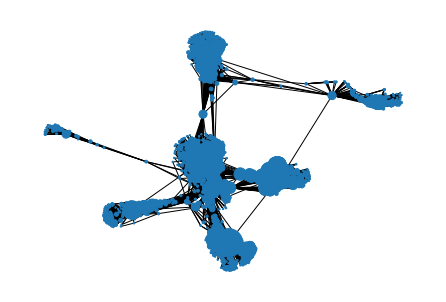

In [30]:
node_size =  [v[1] for v in degree_centrality]
networkx.draw(fbGraph,node_size=node_size)

The code below sets the node size proportional to the node's betweenness centrality. 

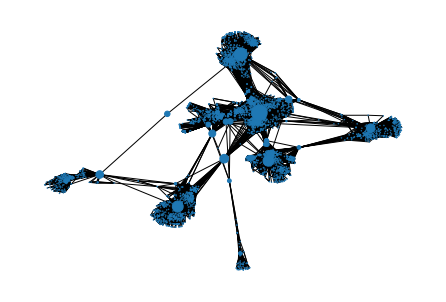

In [31]:
node_size =  [v*500 for v in betweenness_centrality.values()]
networkx.draw(fbGraph,node_size=node_size)

# TURF

TURF stands for Total Unduplicated Reach and Frequency. 

Imagine you are a social media manager for a large company. You are planning to hire a group of Facebook influencers to promote your brand. Your goal is to maximize your *unduplicated* reach -- i.e. the total number of *unique* people who see the posts about your brand made by these influencers. 

For example, if influencer A and B each had the following followers:

*   A: 1, 2, 3
*   B: 1, 3, 4, 5

If you were to hire only A, your reach would be three: you would reach A's three followers 1, 2, and 3. If you were to hire only B, your reach would be four: you would reach B's four followers 1, 3, 4, and 5. If you were to hire both A and B, you would reach all of A's followers and all of B's followers, but these overlap, so your *unduplicated* reach would be five: followers 1, 2, 3, 4, and 5. 

`influencer_nodes` is a list of the nodes that belong to influencers we can hire. 

In [65]:
influencer_nodes = [428,1431,1352,2142]

The cost for each influencer is given in the `sponsorship_cost` dictionary, declared below. 

In [67]:
sponsorship_cost = {
    428:1000,
    1431:1000,
    1352:2000,
    2142:1500,
    }


The `getReach` function takes a `graph` and a list of nodes (`promoter_nodes`). It returns the *unduplicated* reach of these nodes. 

In [68]:
def getReach(graph,promoter_nodes):
  set_of_neighbours = set()
  for node in promoter_nodes:
    for neighbour in graph.neighbors(node):
      set_of_neighbours.add(neighbour)
  return(len(set_of_neighbours))

In [69]:
# example
getReach(fbGraph,[109,1395,2394])

134

Let's see what the reach is for each of our influencers.

In [70]:
print('INFLUENCER      REACH        COST      COST/REACH')
print('----------   ----------   ----------   ----------')
for influencer in influencer_nodes:
  reach = getReach(fbGraph,[influencer])
  cost = sponsorship_cost[influencer]
  cost_per_reach = cost/reach
  print('{influencer:>10}   {reach:>10}   {cost:>10}   {cost_per_reach:>10.2f}'.format(influencer=influencer,reach=reach,cost=cost,cost_per_reach=cost_per_reach))

INFLUENCER      REACH        COST      COST/REACH
----------   ----------   ----------   ----------
       428          115         1000         8.70
      1431          220         1000         4.55
      1352          234         2000         8.55
      2142          221         1500         6.79


Now, let's iterate over every possible combination of influencers that we could hire and measure the reach and cost for each. We'll skip combinations that cost more than our budget of $10,000.

In [71]:
print('INFLUENCERS          REACH        COST      COST/REACH')
print('---------------   ----------   ----------   ----------')
for combination in chain.from_iterable(combinations(influencer_nodes,r) for r in range(len(influencer_nodes)+1)):
  cost = sum([sponsorship_cost[influencer] for influencer in combination])
  if cost>3000:
    continue
  reach = getReach(fbGraph,combination)
  if reach==0:
    continue
  cost_per_reach = cost/reach
  influencers = ', '.join([str(x) for x in combination])
  print('{influencers:<15}   {reach:>10}   {cost:>10}   {cost_per_reach:>10.2f}'.format(influencers=influencers,reach=reach,cost=cost,cost_per_reach=cost_per_reach))

INFLUENCERS          REACH        COST      COST/REACH
---------------   ----------   ----------   ----------
428                      115         1000         8.70
1431                     220         1000         4.55
1352                     234         2000         8.55
2142                     221         1500         6.79
428, 1431                334         2000         5.99
428, 1352                348         3000         8.62
428, 2142                335         2500         7.46
1431, 1352               273         3000        10.99
1431, 2142               441         2500         5.67
